<a href="https://colab.research.google.com/github/Gyvichi/durunuri/blob/main/FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. scipy.fftpack
```py
from scipy.fftpack import fft, ifft
```
- scipy.fftpack.fft()
- scipy.fftpack.ifft
- scipy.fftpack.fftfreq()
  - 샘플링 주파수 생성

2. cmath
- fft()

In [ ]:
import cmath

def fft(x):
    N = len(x)
    if N <= 1:
        return x

    even = fft(x[0::2])
    odd = fft(x[1::2])

    T = [cmath.exp(-2j * cmath.pi * k / N) * odd[k] for k in range(N // 2)]

    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

def main():
    signal = [0, 1, 2, 3]  # Replace with your input signal
    result = fft(signal)

    print("FFT result:")
    for val in result:
        print(val)

FFT result:
(6+0j)
(-2+2j)
(-2+0j)
(-1.9999999999999998-2j)


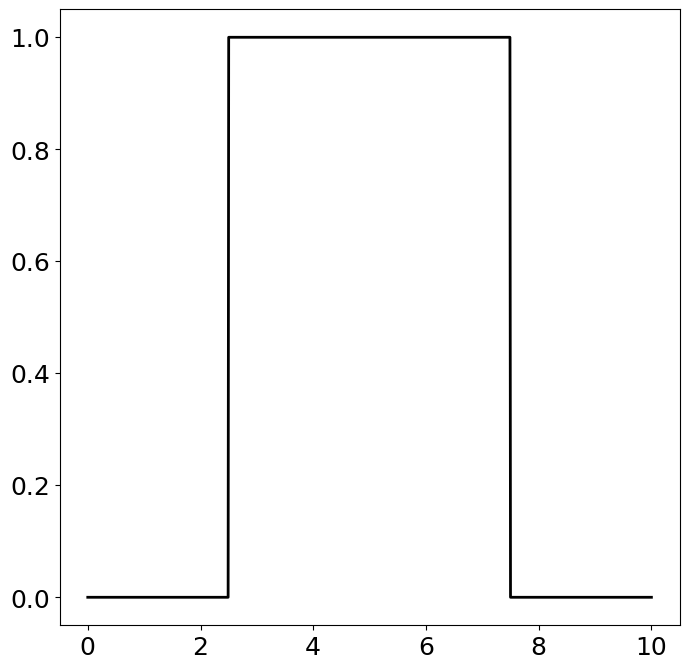

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})
plt.rcParams['animation.html'] = 'jshtml'


dx = 0.01
L = 10
x = np.arange(0,L+dx,dx)
n = len(x)
nquart = int(np.floor(n/4))

f = np.zeros_like(x)
f[nquart:3*nquart] = 1

A0 = np.sum(f * np.ones_like(x)) * dx * 2 / L
fFS = A0/2 * np.ones_like(f)

fig,ax = plt.subplots()
plt.plot(x,f,color='k',linewidth=2)
fFS_plot, = plt.plot([],[],color='r',linewidth=2)

all_fFS = np.zeros((len(fFS),101))
all_fFS[:,0] = fFS

for k in range(1,101):
    Ak = np.sum(f * np.cos(2*np.pi*k*x/L)) * dx * 2 / L
    Bk = np.sum(f * np.sin(2*np.pi*k*x/L)) * dx * 2 / L
    fFS = fFS + Ak*np.cos(2*k*np.pi*x/L) + Bk*np.sin(2*k*np.pi*x/L)
    all_fFS[:,k] = fFS

def init():
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(-0.2, 1.2)
    return fFS

def animate(iter):
    fFS_plot.set_data(x,all_fFS[:,iter])
    return fFS_plot